In [21]:
import os
import cv2
import pathlib
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [22]:
train_path='C:/Varun/SOI Project/train'
test_path='C:/Varun/SOI Project/test'
train_dir=pathlib.Path(train_path)
test_dir=pathlib.Path(test_path)
print(train_dir)

C:\Varun\SOI Project\train


In [23]:
data_dictionary={
    'Angry':list(train_dir.glob('angry/*')),
    'Disgust':list(train_dir.glob('disgust/*')),
    'Fear':list(train_dir.glob('fear/*')),
    'Happy':list(train_dir.glob('happy/*')),
    'Sad':list(train_dir.glob('sad/*')),
    'Surprise':list(train_dir.glob('surprise/*')),
    'Neutral':list(train_dir.glob('neutral/*'))
}
labels_dictionary={
    'Angry':0,
    'Disgust':1,
    'Fear':2,
    'Happy':3,
    'Sad':4,
    'Surprise':5,
    'Neutral':6
}
print(pathlib.Path(data_dictionary['Angry'][0]))

C:\Varun\SOI Project\train\angry\Training_10118481.jpg


In [24]:
# To check size of an image
img1=cv2.imread(str(data_dictionary['Surprise'][0])) # Check's size of 1st image in Surprise folder
print(img1) 
print(img1.shape)

[[[144 144 144]
  [132 132 132]
  [125 125 125]
  ...
  [239 239 239]
  [243 243 243]
  [240 240 240]]

 [[144 144 144]
  [121 121 121]
  [118 118 118]
  ...
  [240 240 240]
  [240 240 240]
  [242 242 242]]

 [[112 112 112]
  [ 97  97  97]
  [108 108 108]
  ...
  [242 242 242]
  [241 241 241]
  [243 243 243]]

 ...

 [[ 80  80  80]
  [ 87  87  87]
  [ 79  79  79]
  ...
  [237 237 237]
  [237 237 237]
  [237 237 237]]

 [[ 87  87  87]
  [ 75  75  75]
  [ 89  89  89]
  ...
  [236 236 236]
  [237 237 237]
  [237 237 237]]

 [[ 96  96  96]
  [ 96  96  96]
  [ 96  96  96]
  ...
  [235 235 235]
  [236 236 236]
  [236 236 236]]]
(48, 48, 3)


In [25]:
# To rezise each of the images to 48x48 pixels format
x,y=[],[]
for image_name,images in data_dictionary.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(48,48))
        x.append(resized_img)
        y.append(labels_dictionary[image_name])

In [26]:
x=np.array(x)
y=np.array(y)
print(x)

[[[[ 50  50  50]
   [ 32  32  32]
   [ 15  15  15]
   ...
   [133 133 133]
   [151 151 151]
   [ 86  86  86]]

  [[ 57  57  57]
   [ 34  34  34]
   [ 22  22  22]
   ...
   [138 138 138]
   [151 151 151]
   [ 89  89  89]]

  [[ 61  61  61]
   [ 30  30  30]
   [ 24  24  24]
   ...
   [142 142 142]
   [149 149 149]
   [ 89  89  89]]

  ...

  [[103 103 103]
   [100 100 100]
   [100 100 100]
   ...
   [149 149 149]
   [104 104 104]
   [ 85  85  85]]

  [[107 107 107]
   [111 111 111]
   [113 113 113]
   ...
   [151 151 151]
   [120 120 120]
   [ 86  86  86]]

  [[104 104 104]
   [104 104 104]
   [112 112 112]
   ...
   [143 143 143]
   [136 136 136]
   [ 83  83  83]]]


 [[[ 29  29  29]
   [ 24  24  24]
   [ 29  29  29]
   ...
   [ 11  11  11]
   [ 12  12  12]
   [ 17  17  17]]

  [[ 17  17  17]
   [ 14  14  14]
   [ 14  14  14]
   ...
   [ 15  15  15]
   [ 20  20  20]
   [ 23  23  23]]

  [[  0   0   0]
   [  4   4   4]
   [  3   3   3]
   ...
   [ 33  33  33]
   [ 35  35  35]
   [ 23  23

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=43)
print(x_train.shape)
print(x_test.shape)
x_train_scaled=x_train/255
x_test_scaled=x_test/255

(25838, 48, 48, 3)
(2871, 48, 48, 3)


In [28]:
num_classes=7
y_train1=keras.utils.to_categorical(y_train,7)
y_test1=keras.utils.to_categorical(y_test,7)

In [29]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=64,kernel_size=(5,5),padding='same',activation='relu',input_shape=(48,48,3)))
model.add(keras.layers.MaxPool2D(strides=2))
model.add(keras.layers.Conv2D(filters=64,kernel_size=(5,5),padding='valid',activation='relu'))
model.add(keras.layers.MaxPool2D(strides=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(7,activation='softmax'))

In [30]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=16,epochs=20,validation_split=0.1)

Epoch 1/20
1454/1454 [==============================] - 84s 57ms/step - loss: 2.0254 - accuracy: 0.2892 - val_loss: 1.6932 - val_accuracy: 0.3560
Epoch 2/20
1454/1454 [==============================] - 83s 57ms/step - loss: 1.6093 - accuracy: 0.3768 - val_loss: 1.6135 - val_accuracy: 0.3901
Epoch 3/20
1454/1454 [==============================] - 83s 57ms/step - loss: 1.5011 - accuracy: 0.4224 - val_loss: 1.5759 - val_accuracy: 0.3986
Epoch 4/20
1454/1454 [==============================] - 83s 57ms/step - loss: 1.3825 - accuracy: 0.4756 - val_loss: 1.5300 - val_accuracy: 0.4195
Epoch 5/20
1454/1454 [==============================] - 85s 59ms/step - loss: 1.2383 - accuracy: 0.5339 - val_loss: 1.5523 - val_accuracy: 0.4389
Epoch 6/20
1454/1454 [==============================] - 82s 57ms/step - loss: 1.0707 - accuracy: 0.6064 - val_loss: 1.5650 - val_accuracy: 0.4570
Epoch 7/20
1454/1454 [==============================] - 82s 57ms/step - loss: 0.8787 - accuracy: 0.6831 - val_loss: 1.7327 -

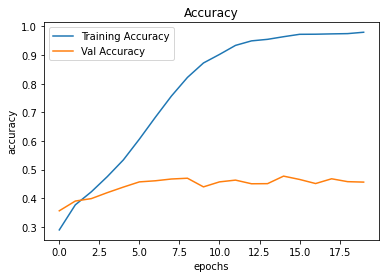

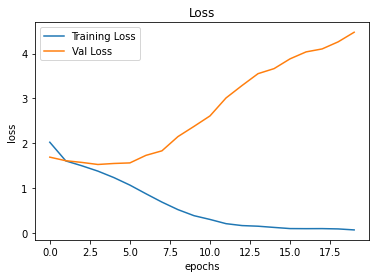

In [31]:
pyplot.figure(0)
pyplot.plot(history.history['accuracy'],label='Training Accuracy')
pyplot.plot(history.history['val_accuracy'],label='Val Accuracy')
pyplot.title('Accuracy')
pyplot.xlabel('epochs')
pyplot.ylabel('accuracy')
pyplot.legend()
pyplot.show()
pyplot.figure(1)
pyplot.plot(history.history['loss'],label='Training Loss')
pyplot.plot(history.history['val_loss'],label='Val Loss')
pyplot.title('Loss')
pyplot.xlabel('epochs')
pyplot.ylabel('loss')
pyplot.legend()
pyplot.show()